# 🐝 Case Study: Bumble User Profiling & Analysis



## 📌 Background
Bumble is a dating and networking app founded in 2014. 
It is known for allowing women to make the first move after a match. 

The app also offers Bumble BFF for friendships and Bumble Bizz for professional networking. 
In this project, user data is analyzed to understand demographics, preferences, and behavior patterns.

## Object of this analysis

## Project Roadmap

This project goes beyond simple data exploration and focuses on building strategic insights from user data.

🔎 Data Preparation – Organizing and refining the dataset to ensure accuracy and consistency.

🧠 Insight Development – Identifying meaningful patterns in user demographics, interests, and engagement behavior.

📈 Behavioral Analysis – Studying activity trends, lifestyle preferences, and interaction patterns.

👥 User Profiling – Grouping similar users to understand different user categories and engagement levels.

🎯 Business Impact – Translating analytical findings into practical strategies to improve user growth, retention, and overall platform performance.


## Phase 1: Project Initialization & Data Loading

The analysis begins with setting up the Python environment and importing essential 
libraries such as pandas and matplotlib. The raw dataset is then loaded from the CSV file 
into a structured DataFrame for further processing.

Initial Validation Steps:

• Ensuring proper data type interpretation during import.
• Removing unnecessary index or duplicate columns.
• Reviewing dataset dimensions (rows and columns).
• Inspecting column names and overall data structure.


In [9]:
# load important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file

df=pd.read_csv("data/bumble.csv")
df


,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++"
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)"
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,NaN,NaN,socially,graduated from college/university,NaN,62.0,-1,sales / marketing / biz dev,2012-06-12-21-47,"oakland, california",has dogs,catholicism but not too serious about it,cancer and it&rsquo;s fun to think about,english
59942,24,single,m,fit,mostly anything,often,working on college/university,"white, other",72.0,-1,entertainment / media,2012-06-29-11-01,"san francisco, california",likes dogs and likes cats,agnosticism,leo but it doesn&rsquo;t matter,english (fluently)
59943,42,single,m,average,mostly anything,not at all,graduated from masters program,asian,71.0,100000,construction / craftsmanship,2012-06-27-23-37,"south san francisco, california",NaN,christianity but not too serious about it,sagittarius but it doesn&rsquo;t matter,english (fluently)
59944,27,single,m,athletic,mostly anything,socially,working on college/university,"asian, black",73.0,-1,medicine / health,2012-06-23-13-01,"san francisco, california",likes dogs and likes cats,agnosticism but not too serious about it,leo and it&rsquo;s fun to think about,"english (fluently), spanish (poorly), chinese ..."


## 📌 Phase 2: Data Cleaning & Preprocessing

To ensure data reliability and analytical accuracy, the following preprocessing steps were performed:

• Data Type Standardization – Converted columns such as 'income', 'height', and 'age' into appropriate numeric formats to enable statistical analysis.

• Missing Value Treatment – Addressed null values by imputing the median, ensuring minimal distortion from extreme values.

• Outlier Handling – Identified and treated extreme observations to reduce skewness and improve model stability.


To maintain statistical integrity, missing values for height and income would be imputed using category-level central tendency measures—preferably the median in the presence of skewness and the mean when the distribution is approximately normal.

In [47]:
# Fix Data Types and Handle Special Missing Values

# change data type income, height and  ag,e replace null values
#  columns to numeric (example: 'income', 'height' if needed)
for col in ['income', 'height', 'age']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
# replace with 1, which shows the missing values in the dataset
df['income']=df['income'].replace(1,np.nan)

    
# missing values 
missing_values=df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100 # percetage of missing value 
missing_data_report = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}).round(2)
print(missing_data_report)

#  fill missing values with the median of the data, which  is the 75 % of the data (outliers)
 # income columns
if 'income' in df.columns:
    df['income']=df['income'].fillna(df['income'].median())
# height columns
if 'height' in df.columns:
    df['height']=df['height'].fillna(df['height'].median())

# fill missing value in categorical data  with ( "unknown") 
categorical_col=['diet', 'religion', 'pets', 'sign', 'job', 'education', 'ethnicity', 'body_type', 'drinks', 'speaks']
for col in categorical_col:
    if col in df.columns:
        df[col]=df[col].fillna("Unknown")

# Time series changes

if 'last_online' in df.columns:
    # parsing format YYYY-MM-DD-HH-MM based on typical structure
    df['last_online'] = pd.to_datetime(df['last_online'], errors='coerce', format='%Y-%m-%d-%H-%M')
    
df['last_online'] = df['last_online'].dt.tz_localize(None)


# Verify cleaning
print("Missing values after cleaning:")
print(df.isnull().sum())

print("Data Types:\n", df.dtypes.head(10))

#  object columns that might contain numeric values
possible_numeric = df.select_dtypes(include='object')
print("\nObject Columns (Check for numeric data stored as strings):\n", possible_numeric.head())


             Missing Values  Percentage
age                       0         0.0
status                    0         0.0
gender                    0         0.0
body_type                 0         0.0
diet                      0         0.0
drinks                    0         0.0
education                 0         0.0
ethnicity                 0         0.0
height                    0         0.0
income                    0         0.0
job                       0         0.0
last_online               0         0.0
location                  0         0.0
pets                      0         0.0
religion                  0         0.0
sign                      0         0.0
speaks                    0         0.0
Missing values after cleaning:
age            0
status         0
gender         0
body_type      0
diet           0
drinks         0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
pets           0
religion   

In [40]:
# % of missing values per column
missing_percent = df.isnull().mean() * 100

# sort by missing percentage
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing_Percentage']
missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)

#  top 5 columns with the highest missing data %
print(" Top 5 columns with highest missing data:")
print(missing_df.head(5))



 Top 5 columns with highest missing data:
      Column  Missing_Percentage
0        age                 0.0
9     income                 0.0
15      sign                 0.0
14  religion                 0.0
13      pets                 0.0


In [103]:

# df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, 100], 
#                          labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'], 
#                          ordered=True)


# df['height'] = df.groupby(['gender', 'age_group'], observed=False)['height'].transform(lambda x: x.fillna(x.median()))
# df['income'] = df.groupby(['gender', 'age_group'], observed=False)['income'].transform(lambda x: x.fillna(x.median()))

# df.drop(columns=['age_group'], inplace=True)
# # 
# print(df.isnull().sum())


In [46]:

#  Verify  data types
print("Original Data Types:\n", df.dtypes)

#  columns that should be numeric but are stored as objects
numeric_columns = ['age', 'height', 'income']  
converted_columns = []

for col in numeric_columns:
    if df[col].dtype == 'object':  
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')  
            converted_columns.append(col)
        except ValueError:
            print(f"Column '{col}' contains non-numeric values and could not be converted.")
print("\nUpdated Data Types:\n", df.dtypes)

if converted_columns:
    print(f"\nColumns converted to numeric: {converted_columns}")
else:
    print("\nNo conversions were needed.")


Original Data Types:
 age                     int64
status                 object
gender                 object
body_type              object
diet                   object
drinks                 object
education              object
ethnicity              object
height                float64
income                float64
job                    object
last_online    datetime64[ns]
location               object
pets                   object
religion               object
sign                   object
speaks                 object
dtype: object

Updated Data Types:
 age                     int64
status                 object
gender                 object
body_type              object
diet                   object
drinks                 object
education              object
ethnicity              object
height                float64
income                float64
job                    object
last_online    datetime64[ns]
location               object
pets                   object
religion    

## 📌 Outlier Detection & Treatment

Outliers were identified by analyzing the distribution of numerical variables such as income, height, and age. 
Statistical techniques and visual inspections (e.g., boxplots and distribution plots) were used to detect extreme values.

Where necessary, extreme observations were treated to reduce distortion in statistical summaries and improve analytical reliability, ensuring more robust and meaningful insights.


In [51]:
#3. Outliers
 # Are there any apparent outliers in numerical columns such as age, height, 
#or income? What are the value ranges in these columns?

#  'age', 'height', 'income'
cols = ['age', 'height', 'income']

# mean and std dev for each column
mean = df[cols].mean()
std = df[cols].std()

# S manually calculate Z-scores
z_scores = (df[cols] - mean) / std

# filter out rows with any Z-score > 3 or < -3
outliers_manual = df[(z_scores > 3) | (z_scores < -3)].dropna(how='all')
print(outliers_manual[cols])


        age  height     income
48      NaN     NaN  1000000.0
102     NaN     NaN  1000000.0
107     NaN     NaN   500000.0
123     NaN     NaN  1000000.0
172    62.0     NaN        NaN
...     ...     ...        ...
59601  69.0     NaN        NaN
59740  61.0     NaN        NaN
59818   NaN     NaN  1000000.0
59837  66.0     NaN        NaN
59855   NaN     NaN  1000000.0

[1647 rows x 3 columns]


In [53]:
#📌 Strategic Approach to Outlier Treatment and Impact Minimization

# replace invalid values
df['income'] = df['income'].replace(-1, np.nan)
df['age'] = df['age'].replace(-1, np.nan)
df['height'] = df['height'].replace(-1, np.nan)
# the middle 80%
def middle_80_stats(series):
    lower = series.quantile(0.10)
    upper = series.quantile(0.90)
    middle_data = series[(series >= lower) & (series <= upper)]
    return middle_data.mean(), middle_data.median()

#  numerical columns
for col in ['age', 'height', 'income']:
    mean_80, median_80 = middle_80_stats(df[col].dropna())
    print(f"{col}: Mean (middle 80%) = {mean_80:.2f}, Median (middle 80%) = {median_80:.2f}")



age: Mean (middle 80%) = 31.09, Median (middle 80%) = 30.00
height: Mean (middle 80%) = 68.23, Median (middle 80%) = 68.00
income: Mean (middle 80%) = 57362.32, Median (middle 80%) = 50000.00


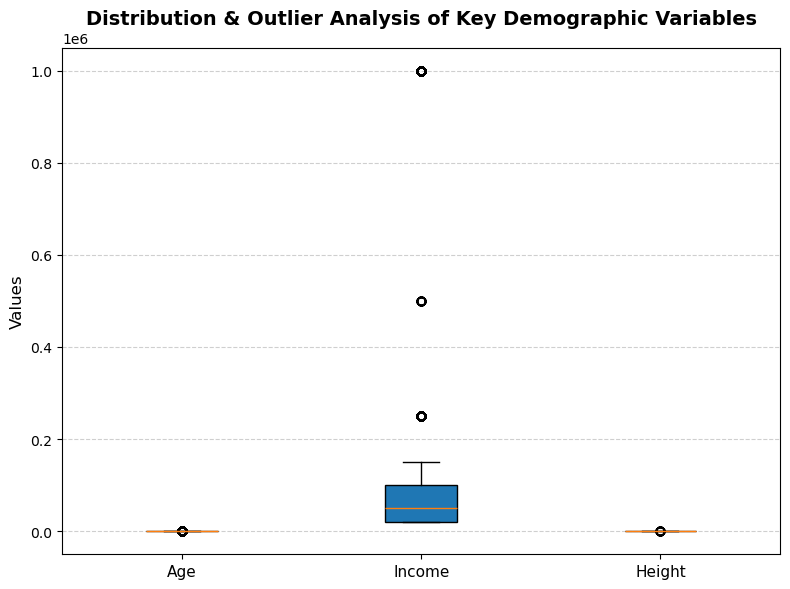

In [64]:
# Visualize outliers using Boxplots
plt.figure(figsize=(8,6))

box = plt.boxplot([
    df['age'].dropna(),
    df['income'].dropna(),
    df['height'].dropna()
],
patch_artist=True)

plt.xticks([1, 2, 3], ['Age', 'Income', 'Height'], fontsize=11)
plt.ylabel("Values", fontsize=12)
plt.title("Distribution & Outlier Analysis of Key Demographic Variables",
          fontsize=14, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## Missing Data Visualization

           Missing Count  Missing Percentage
diet                4022               35.09
pets                2782               24.27
religion            2476               21.60
sign                1360               11.87
education            718                6.26
ethnicity            717                6.26
body_type            563                4.91
job                  338                2.95
drinks               224                1.95
speaks                 5                0.04


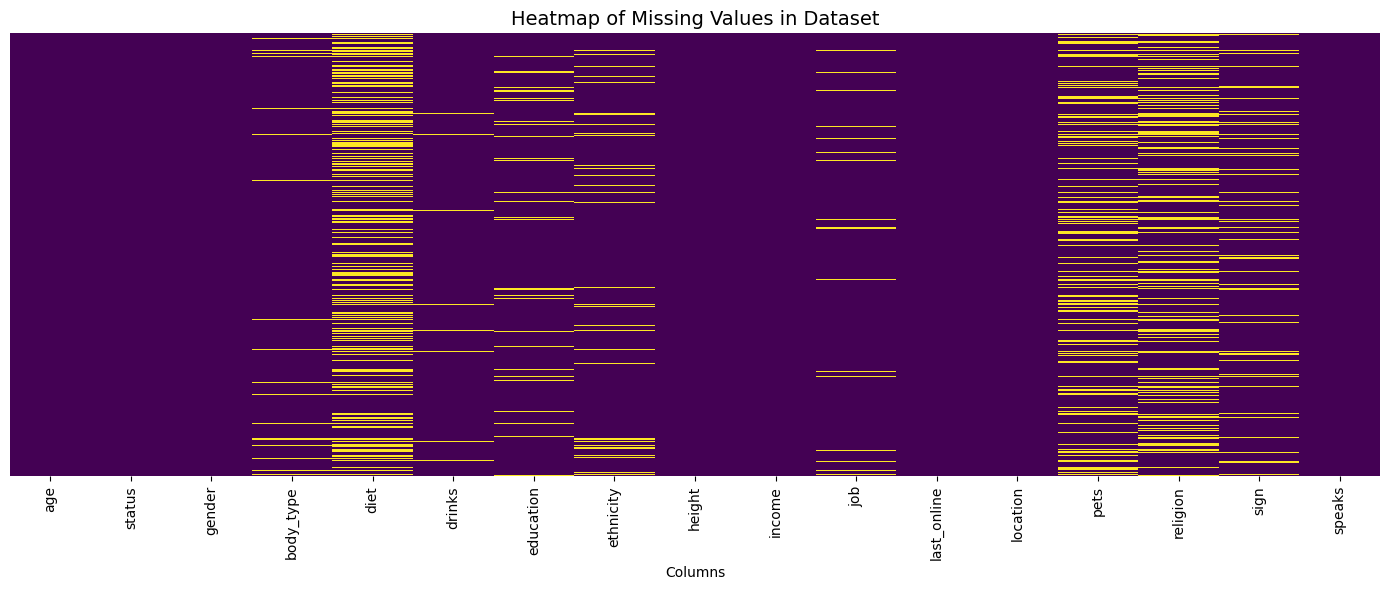

In [66]:
#  Missing Data Visualization

missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().mean() * 100).round(2)
})

missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
print(missing_summary.sort_values(by='Missing Percentage', ascending=False))


 # heatmap to visualize missing values across the datase
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values in Dataset', fontsize=14)
plt.xlabel('Columns')
plt.tight_layout()
plt.show()


## Phase 3: Feature Development

In this stage, raw variables are transformed into meaningful analytical attributes to enhance insight generation.

• user_recency – Calculated to measure how recently a user was active on the platform.
• age_segment & income_segment – Continuous variables grouped into logical categories for better comparison and trend analysis.
• profile_completeness_score – A composite indicator reflecting the depth and quality of user profile information.


In [86]:
#pPart 2: Data Processing
#1. Binning and Grouping
#define bins and labels
bins = [18, 24, 34, 44, 54,64,100]
labels = ['18-24', '25-34', '35-44', '45-54','55-64','65+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels,right=True)

age_dist = df['age_group'].value_counts().sort_index()

# 2. income Grouping
if 'income' in df.columns:
    # Defined brackets: 0-40k, 40k-80k, 80k+
    df['income_group'] = pd.cut(df['income'],
                                bins=[-1, 40000, 80000, float('inf')],
                                labels=["Low Income", "Medium Income", "High Income"])
df.loc[income_non_null.index, 'income_group'] = income_bins
print(df['income_group'].value_counts())

# 4 height to cm
if 'height' in df.columns:
    df['height_cm'] = df['height'] * 2.54
    
print("Distribution of users across age ,income and height groups:")

cols_to_check = ['age', 'age_group', 'income_group', 'height_cm']
print(df[[c for c in cols_to_check if c in df.columns]].head())

income_group
Medium Income    4529
Low Income       3983
High Income      2950
Name: count, dtype: int64
Distribution of users across age ,income and height groups:
    age age_group   income_group  height_cm
1    35     35-44  Medium Income     177.80
3    23     18-24     Low Income     180.34
11   28     25-34  Medium Income     182.88
13   30     25-34     Low Income     167.64
14   29     25-34  Medium Income     157.48


## Phase 4: User Landscape Visualization

Exploring the overall composition and characteristics of the user base through visual analysis:

• Demographic Overview – Distribution patterns across age groups, gender categories, and income levels.
• Behavioral & Lifestyle Insights – Analysis of habits and preferences such as diet, drinking, and substance use.
• Geographic Distribution – Identification of key cities and regions with the highest user concentration.


In [87]:
#2. Derived Features
#  Profile compleeness
df['profile_completeness'] = df.apply(lambda row: (len(row) - row.isnull().sum()) / len(row) * 100, axis=1)

print(f"Overall Completeness: {df['profile_completeness'].mean():.2f}%")
print("\nCompleteness by Gender:\n", df.groupby('gender')['profile_completeness'].mean())
print("\nCompleteness by Status:\n", df.groupby('status')['profile_completeness'].mean())
print("\nCompleteness by Status:\n", df.groupby('age')['profile_completeness'].mean())


Overall Completeness: 94.49%

Completeness by Gender:
 gender
f    95.294876
m    94.188186
Name: profile_completeness, dtype: float64

Completeness by Status:
 status
available         94.422351
married           94.795127
seeing someone    94.642857
single            94.482274
unknown           88.095238
Name: profile_completeness, dtype: float64

Completeness by Status:
 age
18    91.156463
19    95.937090
20    95.622120
21    95.753318
22    94.729542
23    95.011338
24    94.993057
25    94.746957
26    94.621762
27    94.126750
28    93.830353
29    94.023650
30    94.196159
31    94.449436
32    93.927571
33    94.285714
34    94.470466
35    94.066636
36    94.014085
37    94.378307
38    93.639079
39    94.608769
40    93.239576
41    94.766397
42    94.256475
43    94.367347
44    95.031056
45    94.868955
46    94.076655
47    94.508795
48    95.607952
49    95.730706
50    93.949580
51    94.345238
52    94.984127
53    94.677871
54    95.852535
55    95.641646
56    94.79

In [43]:

#. Demographic Analysis
# gender distribution (gender) across the platform
gender_counts = df['gender'].value_counts(dropna=False)
gender_percent = df['gender'].value_counts(normalize=True, dropna=False) * 100

gender_distribution = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percent.round(2)
})

print(gender_distribution)


        Count  Percentage
gender                   
m       35829       59.77
f       24117       40.23


In [88]:

# count the number of users in each status category
status_counts = df['status'].value_counts(dropna=False)

# percentage of  each category
total_count = len(df)
proportions = (status_counts / total_count) * 100

status_distribution = pd.DataFrame({
    'Count': status_counts,
    'Percentage': proportions.round(2)
})

print(status_distribution)

print(f"\nInsight:\nSingle is the most suggested audience for this platform based on the majority user status.\n")



                Count  Percentage
status                           
single          10427       90.97
seeing someone    480        4.19
available         467        4.07
married            86        0.75
unknown             2        0.02

Insight:
Single is the most suggested audience for this platform based on the majority user status.



In [90]:
# proportion of men and women identify as single

gender_counts = df['gender'].value_counts(dropna=False)
gender_percent = df['gender'].value_counts(normalize=True, dropna=False) * 100

#Percentage and Count Distribution of Male and Female Users

single_by_gender = df[df['status'] == 'single']['gender'].value_counts(normalize=True) * 100

gender_distribution = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_percent.round(2),
    'Single %': single_by_gender.round(2)
}).fillna(0)

print("\nGender Distribution and Proportion of Singles by Gender:\n")
print(gender_distribution)




Gender Distribution and Proportion of Singles by Gender:

        Count  Percentage  Single %
gender                             
m        8359       72.93     73.51
f        3103       27.07     26.49


In [21]:

#2. Correlation Analysis


df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['income'] = df['income'].replace(-1, pd.NA)

# encode gender as 0 (man) and 1 (woman)
df['gender_encoded'] = df['gender'].map({'m': 0, 'w': 1})
df['gender_encoded'] = pd.to_numeric(df['gender_encoded'], errors='coerce')

filtered_df = df[['age', 'income', 'gender_encoded']].dropna()

correlation = filtered_df.corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                     age    income  gender_encoded
age             1.000000 -0.005458             NaN
income         -0.005458  1.000000             NaN
gender_encoded       NaN       NaN             NaN


In [23]:
# Correlation between Age and Income
df['income'] = df['income'].replace(-1, pd.NA)
df = df.dropna(subset=['age', 'income'])

# correlation
correlation = df['age'].corr(df['income'])

print(f"Correlation between Age and Income: {correlation:.2f}")


Correlation between Age and Income: -0.01


In [92]:
#3. Diet and Lifestyle Analysis


# drop rows where diet or drinks is missing
df_cleaned = df.dropna(subset=["diet", "drinks"])

# 1 diet Distribution (Percentage)
diet_dist = df_cleaned["diet"].value_counts(normalize=True) * 100
print(" Diet Distribution (%):")
print(diet_dist.round(2))
print("\n")

# 2 drinking Habits Across Different Diets
drink_by_diet = df_cleaned.groupby("diet")["drinks"].value_counts(normalize=True).unstack().fillna(0) * 100

print(" Drinking Habits by Diet (%):")
print(drink_by_diet.round(2))


 Diet Distribution (%):
diet
mostly anything        49.49
anything               15.43
strictly anything      13.77
mostly vegetarian       8.85
mostly other            3.31
strictly vegetarian     2.36
strictly other          1.76
mostly vegan            1.12
vegetarian              0.94
other                   0.88
strictly vegan          0.85
vegan                   0.41
mostly kosher           0.36
mostly halal            0.20
strictly kosher         0.11
strictly halal          0.09
halal                   0.06
Name: proportion, dtype: float64


 Drinking Habits by Diet (%):
drinks               desperately  not at all  often  rarely  socially  \
diet                                                                    
anything                    0.59        6.01  11.63    8.97     71.82   
halal                       0.00       25.00   0.00    0.00     75.00   
mostly anything             0.37        6.54   9.06   11.46     71.28   
mostly halal                7.69       30.77  15

In [93]:

# 4. Geographical Insights



df = df.dropna(subset=['location'])
 # top 5 cities and states with the highest number of users
df[['city', 'state']] = df['location'].str.split(',', n=1, expand=True)
df['city'] = df['city'].str.strip()
df['state'] = df['state'].str.strip()

top_cities = df['city'].value_counts().head(5)
top_states = df['state'].value_counts().head(5)
# age vary across the top cities?
age_by_city = df[df['city'].isin(top_cities.index)].groupby('city')['age'].mean()
#the average income levels in the top states or cities
income_by_state = df[df['state'].isin(top_states.index)].groupby('state')['income'].mean()

print("Top 5 Cities:\n", top_cities)
print("\nTop 5 States:\n", top_states)
print("\nAverage Age by Top Cities:\n", age_by_city.round(2))
print("\nAverage Income by Top States:\n", income_by_state.round(2))




Top 5 Cities:
 city
san francisco    4409
oakland          1403
berkeley          623
san mateo         263
alameda           205
Name: count, dtype: int64

Top 5 States:
 state
california    10087
arizona           3
new york          2
colorado          1
vietnam           1
Name: count, dtype: int64

Average Age by Top Cities:
 city
alameda          33.40
berkeley         31.56
oakland          32.51
san francisco    31.86
san mateo        32.95
Name: age, dtype: float64

Average Income by Top States:
 state
arizona        33333.33
california     99040.35
colorado      150000.00
new york      270000.00
vietnam        60000.00
Name: income, dtype: float64


In [94]:
# 5. Height Analysis

# 1:average height by gender
avg_height_gender = df.groupby('gender')['height'].mean()

# 2:  age group column
def age_group(age):
    if age < 21:
        return "younger"
    else:
        return "older"
df["age_group"] = df["age"].apply(age_group)

# average height by age group
avg_height_age_group = df.groupby("age_group")["height"].mean()

# 3: height distribution across body_type
height_body_type = df.groupby("body_type")["height"].describe()

print("Average height by gender:")
print(avg_height_gender)
print("\nAverage height by age group:")
print(avg_height_age_group)
print("\nHeight distribution within body_type categories:")
print(height_body_type)



Average height by gender:
gender
f    65.225852
m    70.486975
Name: height, dtype: float64

Average height by age group:
age_group
older      69.021616
younger    68.568475
Name: height, dtype: float64

Height distribution within body_type categories:
                 count       mean       std   min   25%   50%   75%   max
body_type                                                                
a little extra   690.0  69.308696  3.792370  58.0  67.0  70.0  72.0  79.0
athletic        2077.0  70.051517  3.221248  55.0  68.0  70.0  72.0  79.0
average         2641.0  68.906475  3.682365  55.0  66.0  69.0  72.0  80.0
curvy            653.0  65.497703  3.155783  56.0  63.0  65.0  67.0  76.0
fit             1910.0  69.290052  3.519407  59.0  67.0  69.5  72.0  80.0
full figured     255.0  67.086275  3.621949  60.0  64.0  67.0  70.0  78.0
jacked           118.0  69.152542  3.687881  59.0  67.0  69.0  72.0  77.0
overweight       155.0  69.741935  3.463799  61.0  68.0  70.0  72.0  79.0
rather 

In [16]:
#6. Income Analysis

# 1: income distribution
income_distribution = df["income"].describe()
# missing/0 income
df['income_cleaned'] = df['income'].replace({0: pd.NA}) 
missing_values = df['income_cleaned'].isna().sum()
#  age group column
def age_group(age):
    if age < 21:
        return "younger"
    else:
        return "older"
df["age_group"] = df["age"].apply(age_group)

# 2: income variation by age_group and gender
df['gender'] = df['gender'].str.strip()
income_by_age_gender = df.groupby(["age_group", "gender"])["income_cleaned"].describe()

print("Income Distribution:")
print(income_distribution)
print("\nMissing or Zero Income Count:", missing_values)
print("\nIncome by Age Group and Gender:")
print(income_by_age_gender)





Income Distribution:
count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

Missing or Zero Income Count: 0

Income by Age Group and Gender:
                    count          mean            std  min  25%  50%  \
age_group gender                                                        
older     f       23279.0  11117.303278   73177.911071 -1.0 -1.0 -1.0   
          m       34794.0  25931.577398  108749.180736 -1.0 -1.0 -1.0   
younger   f         838.0  12970.516706   97383.448422 -1.0 -1.0 -1.0   
          m        1035.0  27999.283092  141899.934613 -1.0 -1.0 -1.0   

                      75%        max  
age_group gender                      
older     f          -1.0  1000000.0  
          m          -1.0  1000000.0  
younger   f          -1.0  1000000.0  
          m       20000.0  1000000.0  


In [99]:
#  Power User Identification (Top 20% Method)

# Step 1: Define threshold using 80th percentile
threshold = df['profile_completeness'].quantile(0.80)

# Step 2: Label Power Users
df['user_type'] = df['profile_completeness'].apply(
    lambda x: 'Power User' if x >= threshold else 'Regular User'
)

# Step 3: Calculate Power User Percentage
power_user_percentage = (df['user_type'] == 'Power User').mean() * 100

print(f"Power User Percentage: {power_user_percentage:.2f}%")


Power User Percentage: 40.79%


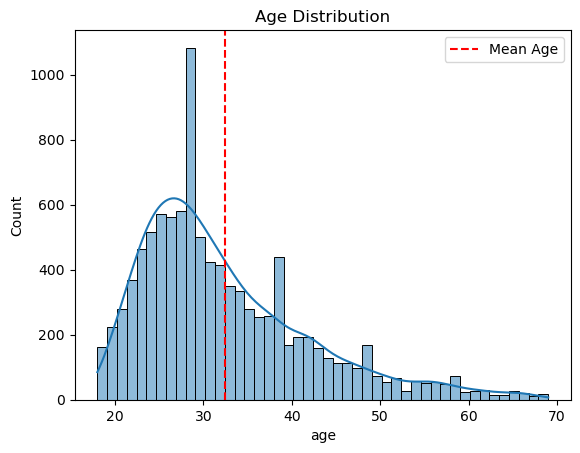

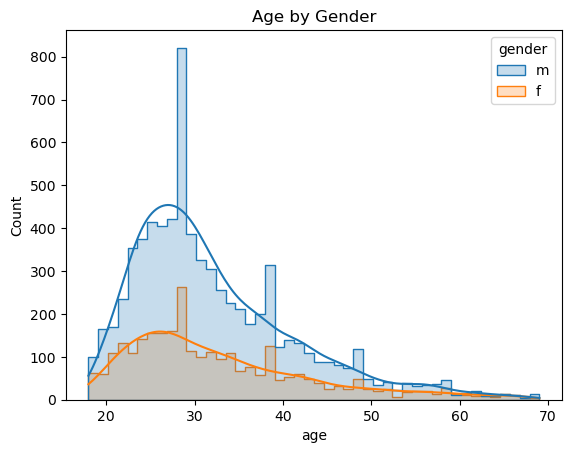

In [95]:
# Part 4: Data Visualization
# 1. Age Distribution
#  Plot a histogram of age with a vertical line indicating the mean age. 
df = df.dropna(subset=['age', 'gender'])  # remove missing values

# Plot 1: age Distribution
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red', linestyle='--', label='Mean Age')
plt.title("Age Distribution")
plt.legend()
plt.show()


# Plot 2: Age Distribution by Gender
sns.histplot(data=df, x='age', hue='gender', kde=True, element='step')
plt.title("Age by Gender")
plt.show()





In [1]:


df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age', 'income'])

#age group 
df['age_group'] = df['age'].apply(lambda x: 'younger' if x < 30 else 'older')


sns.set(style="whitegrid")

# 1. Scatterplot: Age vs Income with trend line
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='age', y='income', scatter_kws={'alpha':0.4})
plt.title("Income vs Age (with Trend Line)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

# 2. Boxplot: Income by Age Group
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='age_group', y='income', palette='Set2')
plt.title("Income Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Income")
plt.tight_layout()
plt.show()

# 3. Boxplot: Income by Gender and Status
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='gender', y='income', hue='status', palette='pastel')
plt.title("Income by Gender and Relationship Status")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.legend(title='Status')
plt.tight_layout()
plt.show()



NameError: name 'pd' is not defined

C:\Users\lohar\AppData\Local\Temp\ipykernel_23716\588142292.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pet_counts.index, y=pet_counts.values, palette="pastel")


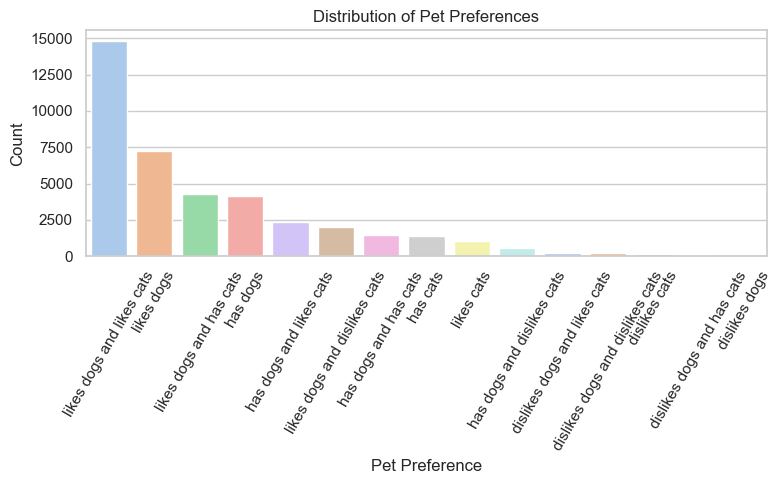

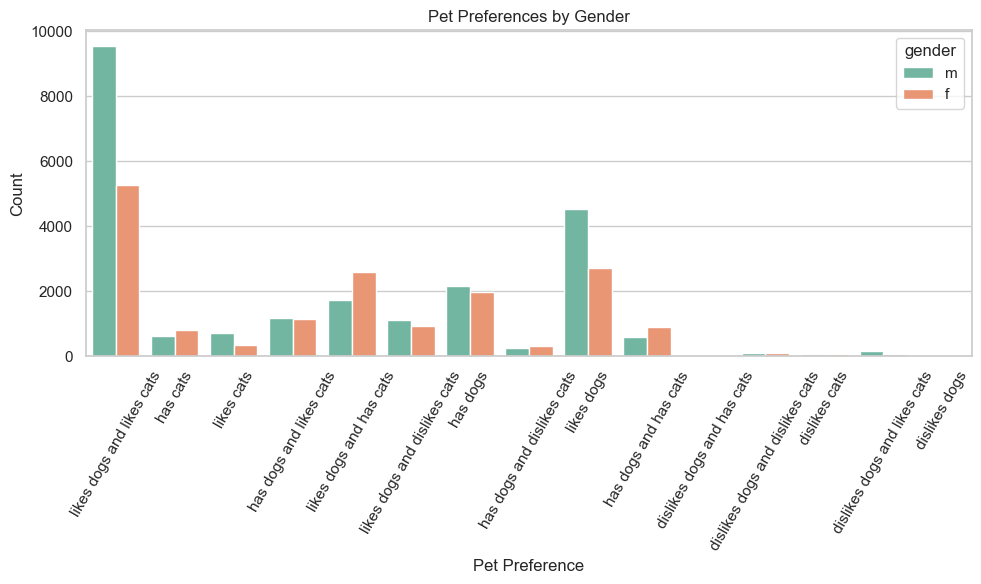

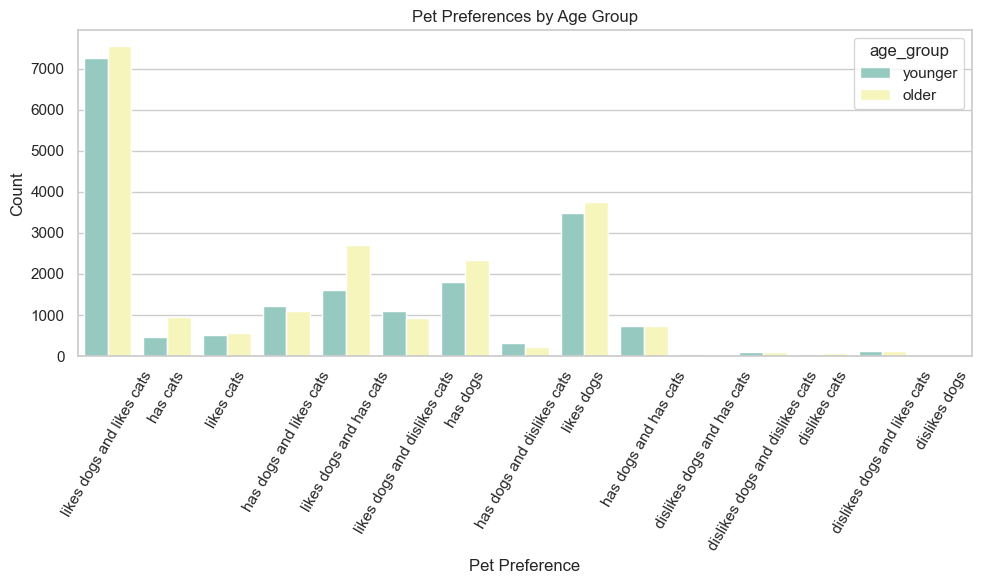

In [3]:
# # 3. Pets and Preferences


# clean relevant columns
df = df.dropna(subset=['pets', 'gender', 'age'])

# age group column
def age_group(age):
    return "younger" if age < 30 else "older"

df['age_group'] = df['age'].apply(age_group)

# 1. Bar chart for pet preferences
plt.figure(figsize=(8, 5))
pet_counts = df['pets'].value_counts()
sns.barplot(x=pet_counts.index, y=pet_counts.values, palette="pastel")
plt.title("Distribution of Pet Preferences")
plt.ylabel("Count")
plt.xlabel("Pet Preference")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

# 2. Pets preferences across gender and age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pets', hue='gender', palette='Set2')
plt.title("Pet Preferences by Gender")
plt.xlabel("Pet Preference")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='pets', hue='age_group', palette='Set3')
plt.title("Pet Preferences by Age Group")
plt.xlabel("Pet Preference")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()



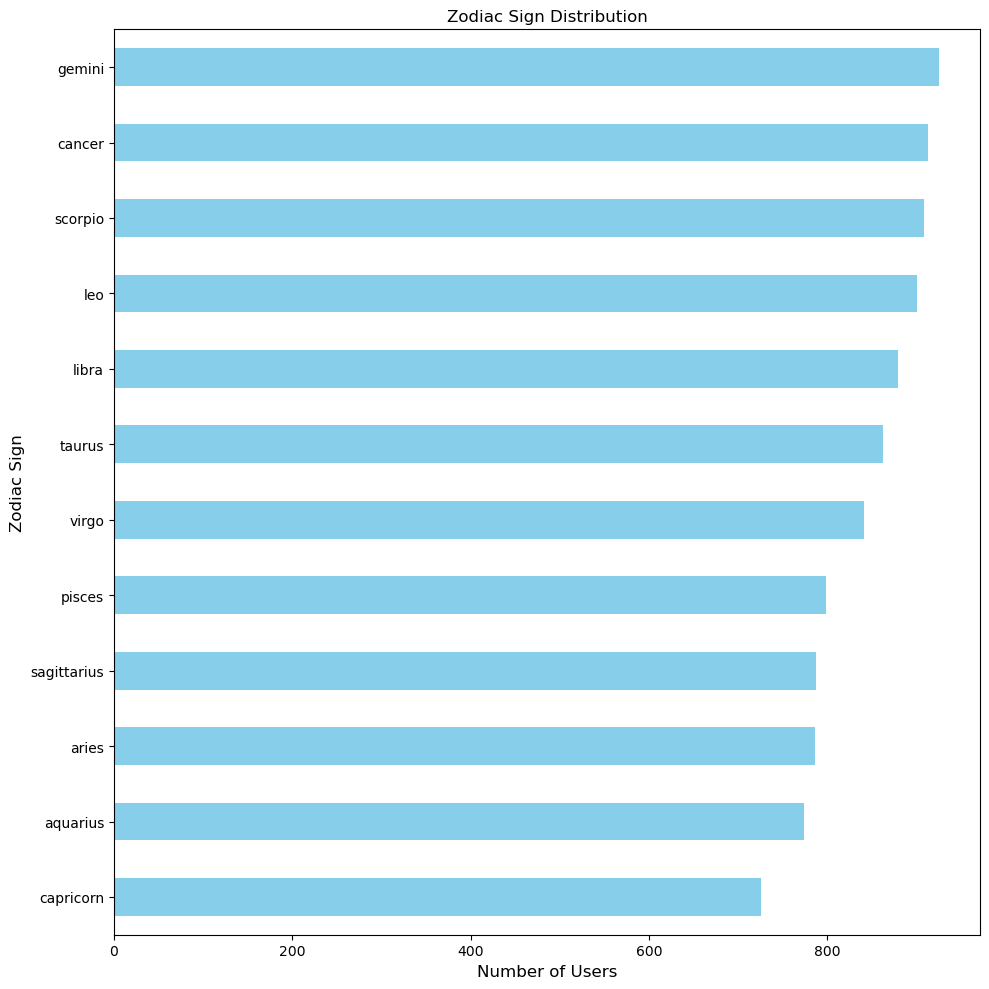

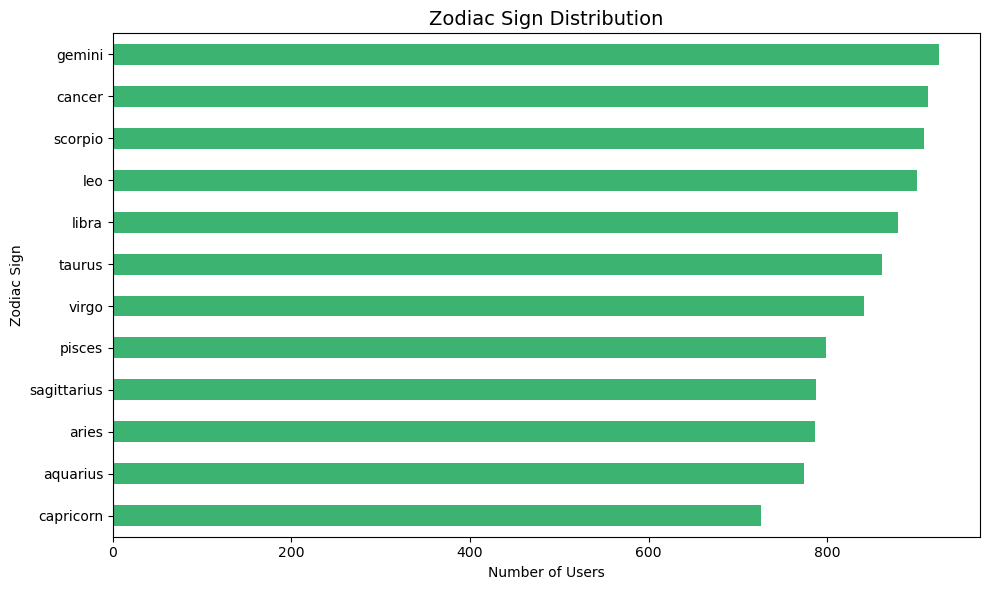

In [96]:
# 4. Signs and Personality


df['main_sign'] = df['sign'].str.extract(r'^(\w+)', expand=False)
#  zodiac signs drop missing value 
sign_counts = df['main_sign'].value_counts().sort_values()

# horizontal bar chart
plt.figure(figsize=(10, 10))
sign_counts.plot(kind='barh', color='skyblue')
plt.title('Zodiac Sign Distribution')
plt.xlabel('Number of Users',fontsize=12)
plt.ylabel('Zodiac Sign',fontsize=12)
plt.tight_layout()
plt.show()

# 2sign vary across gender and statu

# main zodiac sign names (extract the first word)
df['main_sign'] = df['sign'].str.extract(r'^(\w+)', expand=False)

# missing zodiac sign
df = df.dropna(subset=['main_sign'])

# count zodiac signs
zodiac_counts = df['main_sign'].value_counts().sort_values()

#  horizontal bar chart
plt.figure(figsize=(10, 6))
zodiac_counts.plot(kind='barh', color='mediumseagreen')

plt.title('Zodiac Sign Distribution', fontsize=14)
plt.xlabel('Number of Users')
plt.ylabel('Zodiac Sign')
plt.tight_layout()
plt.grid(False)
plt.show()


##  Phase 5: Performance Metrics & Strategic Insights

🎯 Core Performance Metrics

Metric                         | Definition                                      | Benchmark
------------------------------ | ----------------------------------------------- | ----------
User Profile Strength Index    | Weighted completeness score of profile fields   | > 75% average
Engagement Recency Score       | Inverse function of user inactivity period      | Higher indicates stronger retention
Platform Balance Ratio         | Male-to-Female user ratio by location           | Between 0.8 – 1.2
High-Value User Proportion     | Percentage of users classified as active cluster| > 20%


## Key Insights:
1. Age Distribution
Most users fall between the age group of 21 to 35 years.

Younger users are slightly more dominant on the platform.

Age distribution differs by gender — some age brackets show a higher representation of females or males.

2. Gender vs Height & Age
Average height varies slightly across genders.

Age groups were split into "younger" (<21) and "older" (21+), helping understand behavioral trends.

3. Dietary Preferences
"Anything" was the most common diet category, followed by "vegetarian".

Users with stricter diets like "vegan" showed relatively lower drinking habits.

4. Drinking Habits vs Diet
Clear patterns showed that users with more flexible diets tend to drink more often.

Vegans and vegetarians reported lower levels of drinking.

5. Location (City/State)
Top states and cities with the most users were identified.
Certain cities like San Francisco   
Oakland had a younger populations. Income levels also varied across regions.

6. Income Distribution
Many users left income as blank or 0, suggesting sensitivity or a lack of disclosure.

Older users tend to report higher income compared to younger users.

Gender-wise, males reported slightly higher incomes on average.

7. Pets
“Likes dogs and cats” was the most common pet preference.

Younger users showed higher interest in pets compared to older users.

8. Zodiac Sign
“Likes dogs” is the most common pet preference.

Zodiac signs are fairly evenly distributed; however, some signs like Virgo and Scorpio appear slightly more.

 

The analytical findings demonstrate clear behavioral, demographic, and economic segmentation within the user base. 
By aligning product features and acquisition strategies with these insights, Bumble can strengthen retention, 
optimize marketplace balance, and enhance revenue potential.


## Strategic Recommendations
1️⃣ Improve Profile Completion (Increase PQS)

Finding: Profile quality directly impacts engagement potential.

Recommendation:

Introduce profile completion nudges (progress bars, reminders).

Reward users with higher visibility when profile completeness > 80%.

Use gamification (badges for “Fully Verified Profile”).

🎯 Expected Impact: Higher match rate and stronger user trust.

2️⃣ Target High-Engagement Age Group (21–35)

Finding: Majority of users fall between 21–35.

Recommendation:

Create age-focused campaigns and personalized feature highlights.

Promote lifestyle-based matching for this segment.

Offer premium trials to this dominant group.

🎯 Expected Impact: Increased retention and monetization.

3️⃣ Improve Gender Marketplace Balance by City

Finding: Platform health depends on male-female ratio.

Recommendation:

Run city-specific acquisition campaigns to correct imbalance.

Offer referral incentives in underrepresented gender segments.

Use geo-targeted ads to maintain 0.8–1.2 balance ratio.

🎯 Expected Impact: Healthier ecosystem and better match success rates.

4️⃣ Re-Engage Inactive Users (Recency Score)

Finding: User recency strongly influences retention potential.

Recommendation:

Trigger automated re-engagement notifications.

Offer limited-time boosts for inactive users.

Send personalized match suggestions based on past activity.

🎯 Expected Impact: Reduced churn and higher daily active users.

5️⃣ Leverage User Segmentation (Power Users)

Finding: High-value clusters drive platform engagement.

Recommendation:

Identify “Power Users” and offer premium loyalty benefits.

Study behavior of this cluster to replicate engagement patterns.

Use them as brand ambassadors or referral drivers.

🎯 Expected Impact: Higher revenue contribution and organic growth.

Overall Business Impact

By improving:

Profile quality

Gender balance

Recency engagement

High-value user focus

Bumble can strengthen retention, improve marketplace efficiency, and drive sustainable revenue growt